<a href="https://colab.research.google.com/github/MohammedKaif037/air-quality-analysis-india/blob/main/air_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files
uploaded = files.upload()

Saving air-quality-data.csv to air-quality-data.csv


In [45]:
# Air Quality Analysis in Indian Cities
# Project 3: Examining Air Quality in Indian Cities

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Air Quality Analysis in Indian Cities")
print("=" * 50)

# Load the dataset
# Replace 'air_quality_india.csv' with your actual CSV file name
df = pd.read_csv('air-quality-data.csv')

# Data Preprocessing
# Convert 'last_update' to datetime
df['last_update'] = pd.to_datetime(df['last_update'], format='%d-%m-%Y %H:%M:%S')

# Replace 'NA' with NaN
df.replace('NA', np.nan, inplace=True)

# Convert pollutant_avg to numeric, handling non-numeric values
df['pollutant_avg'] = pd.to_numeric(df['pollutant_avg'], errors='coerce')

# Pivot the data to have one row per city and date with pollutants as columns
pivot_df = df.pivot_table(
    values='pollutant_avg',
    index=['city', 'last_update'],
    columns='pollutant_id',
    aggfunc='mean'
).reset_index()

# Rename columns for clarity (e.g., PM2.5 instead of PM2.5)
pivot_df.columns = [col.replace('.', '') for col in pivot_df.columns]

# Extract month for potential seasonal analysis
pivot_df['month'] = pivot_df['last_update'].dt.month

# Note: Sample data is from June 2025, so seasonal variation is limited
# For demonstration, we’ll proceed with analysis on available pollutants

print(" Dataset Overview:")
print("-" * 30)

Air Quality Analysis in Indian Cities
 Dataset Overview:
------------------------------


In [22]:
# 1. Basic Data Exploration
print("Dataset Shape:", pivot_df.shape)
print("\nFirst 5 rows:")
print(pivot_df.head())
print("\nDataset Info:")
print(pivot_df.info())
print("\nStatistical Summary:")
print(pivot_df.describe())

print("\n" + "="*50)
print(" ANALYSIS RESULTS")
print("="*50)

Dataset Shape: (238, 10)

First 5 rows:
         city last_update         CO  NH3        NO2  OZONE       PM10   PM25  \
0    Agartala  2025-06-24   5.000000  2.0   6.000000  19.00        NaN    NaN   
1        Agra  2025-06-24  24.166667  2.2  21.333333  28.50  42.000000  26.40   
2   Ahmedabad  2025-06-24  35.250000  4.4  32.333333  20.75  44.142857  36.75   
3  Ahmednagar  2025-06-24  36.000000  5.0  17.000000  22.00  49.000000  20.00   
4      Aizawl  2025-06-24   3.000000  NaN        NaN   2.00  20.000000    NaN   

         SO2  month  
0  24.000000      6  
1  15.800000      6  
2   9.428571      6  
3   2.000000      6  
4   6.000000      6  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         238 non-null    object        
 1   last_update  238 non-null    datetime64[ns]
 2   CO           226 non

In [46]:
# 2. PM2.5 Analysis
print("\n1.  PM2.5 Analysis:")
print("-" * 25)
if 'PM25' in pivot_df.columns:
    average_pm25 = pivot_df['PM25'].mean()
    print(f"Average PM2.5 across all cities: {average_pm25:.1f} μg/m³")
    # WHO guideline for PM2.5 is 15 μg/m³ annual mean
    if average_pm25 > 15:
        print(f"  Alert: Average PM2.5 ({average_pm25:.1f}) exceeds WHO guideline (15 μg/m³)")
    else:
        print(f" Average PM2.5 is within WHO guidelines")
else:
    print(" PM2.5 data not available in the dataset")


1.  PM2.5 Analysis:
-------------------------
Average PM2.5 across all cities: 41.2 μg/m³
  Alert: Average PM2.5 (41.2) exceeds WHO guideline (15 μg/m³)


In [26]:
# 3. City with Highest NO2 Levels
print("\n2.  City Analysis:")
print("-" * 20)
if 'NO2' in pivot_df.columns:
    city_avg_no2 = pivot_df.groupby('city')['NO2'].mean().sort_values(ascending=False)
    if not city_avg_no2.empty:
        city_highest_no2 = city_avg_no2.index[0]
        highest_no2_value = city_avg_no2.iloc[0]
        print(f"City with highest average NO2 levels: {city_highest_no2} ({highest_no2_value:.1f} μg/m³)")
    else:
        print(" Insufficient NO2 data for city analysis")
else:
    print(" NO2 data not available in the dataset")

# Top 3 most polluted cities by PM2.5
if 'PM25' in pivot_df.columns:
    city_avg_pm25 = pivot_df.groupby('city')['PM25'].mean().sort_values(ascending=False)
    if not city_avg_pm25.empty:
        print(f"\nTop 3 most polluted cities (PM2.5):")
        for i, (city, pm25) in enumerate(city_avg_pm25.head(3).items(), 1):
            print(f"  {i}. {city}: {pm25:.1f} μg/m³")
    else:
        print(" Insufficient PM2.5 data for city ranking")
else:
    print(" PM2.5 data not available for city ranking")


2.  City Analysis:
--------------------
City with highest average NO2 levels: Chhapra (120.0 μg/m³)

Top 3 most polluted cities (PM2.5):
  1. Nandesari: 218.0 μg/m³
  2. Mandi Gobindgarh: 163.0 μg/m³
  3. Baddi: 162.0 μg/m³


In [27]:
# 4. Correlation between Pollutants
print("\n3. Pollutant Correlations:")
print("-" * 30)
pollutants = ['PM25', 'NO2', 'SO2'] if all(col in pivot_df.columns for col in ['PM25', 'NO2', 'SO2']) else pivot_df.columns[2:-1]
correlation_matrix = pivot_df[pollutants].corr()

# Print correlations for PM2.5, NO2, SO2 if available
if 'PM25' in pivot_df.columns and 'NO2' in pivot_df.columns:
    correlation_pm25_no2 = pivot_df['PM25'].corr(pivot_df['NO2'])
    print(f"Correlation between PM2.5 and NO2: {correlation_pm25_no2:.3f}")
if 'PM25' in pivot_df.columns and 'SO2' in pivot_df.columns:
    correlation_pm25_so2 = pivot_df['PM25'].corr(pivot_df['SO2'])
    print(f"Correlation between PM2.5 and SO2: {correlation_pm25_so2:.3f}")
if 'NO2' in pivot_df.columns and 'SO2' in pivot_df.columns:
    correlation_no2_so2 = pivot_df['NO2'].corr(pivot_df['SO2'])
    print(f"Correlation between NO2 and SO2: {correlation_no2_so2:.3f}")

# Interpret correlations
def interpret_correlation(corr_value):
    if pd.isna(corr_value):
        return "N/A"
    if abs(corr_value) > 0.7:
        return "Strong"
    elif abs(corr_value) > 0.5:
        return "Moderate"
    elif abs(corr_value) > 0.3:
        return "Weak"
    else:
        return "Very weak"

if 'PM25' in pivot_df.columns and 'NO2' in pivot_df.columns:
    print(f"\nCorrelation Strength:")
    print(f"  PM2.5-NO2: {interpret_correlation(correlation_pm25_no2)}")
if 'PM25' in pivot_df.columns and 'SO2' in pivot_df.columns:
    print(f"  PM2.5-SO2: {interpret_correlation(correlation_pm25_so2)}")
if 'NO2' in pivot_df.columns and 'SO2' in pivot_df.columns:
    print(f"  NO2-SO2: {interpret_correlation(correlation_no2_so2)}")


3. Pollutant Correlations:
------------------------------
Correlation between PM2.5 and NO2: 0.158
Correlation between PM2.5 and SO2: 0.015
Correlation between NO2 and SO2: -0.012

Correlation Strength:
  PM2.5-NO2: Very weak
  PM2.5-SO2: Very weak
  NO2-SO2: Very weak


In [28]:
# 5. Seasonal Analysis
print("\n4.  Seasonal Patterns:")
print("-" * 25)
# Since data is from June, we’ll group by city instead of month
if all(col in pivot_df.columns for col in ['PM25', 'NO2', 'SO2']):
    city_avg = pivot_df.groupby('city')[['PM25', 'NO2', 'SO2']].mean()
    print("Average pollutant levels by city (single date data):")
    print(city_avg.round(1))
else:
    print(" Insufficient data for seasonal analysis (single date provided)")

print("\n" + "="*50)
print(" VISUALIZATIONS")
print("="*50)


4.  Seasonal Patterns:
-------------------------
Average pollutant levels by city (single date data):
               PM25   NO2   SO2
city                           
Agartala        NaN   6.0  24.0
Agra           26.4  21.3  15.8
Ahmedabad      36.8  32.3   9.4
Ahmednagar     20.0  17.0   2.0
Aizawl          NaN   NaN   6.0
...             ...   ...   ...
Vijayawada     54.3  33.0  16.7
Virar          24.0  14.0  13.0
Virudhunagar   25.0  19.0  16.0
Visakhapatnam  60.0  76.0   8.0
Yadgir         21.0  34.0  14.0

[238 rows x 3 columns]

 VISUALIZATIONS


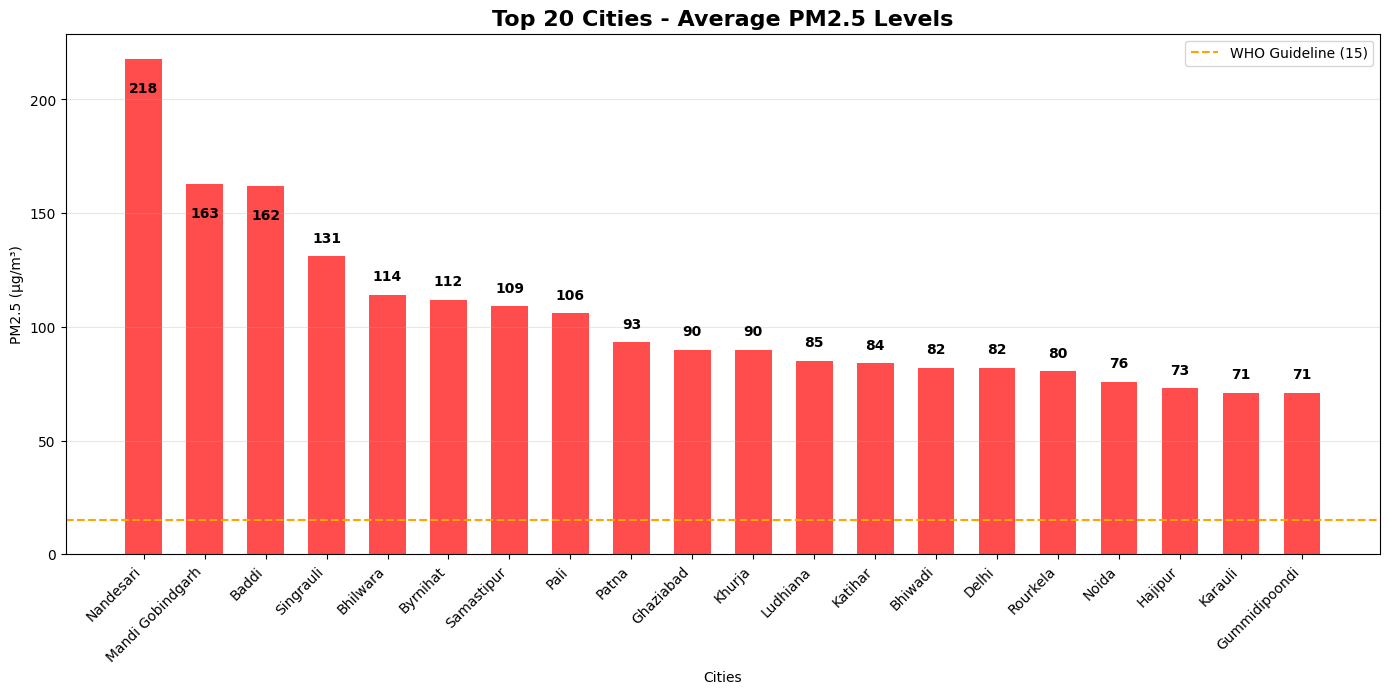

In [37]:
plt.figure(figsize=(14, 7))  # Resize for better spacing

# Get top 20 cities with highest average PM2.5
city_pm25_avg = pivot_df.groupby('city')['PM25'].mean().sort_values(ascending=False).head(20)

bar_width = 0.6
bars = plt.bar(range(len(city_pm25_avg)), city_pm25_avg.values, color='red', alpha=0.7, width=bar_width)

plt.title('Top 20 Cities - Average PM2.5 Levels', fontsize=16, fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('PM2.5 (μg/m³)')

# X-axis labels
plt.xticks(range(len(city_pm25_avg)), city_pm25_avg.index, rotation=45, ha='right')

# WHO guideline line
plt.axhline(y=15, color='orange', linestyle='--', label='WHO Guideline (15)')
plt.legend()

# Grid
plt.grid(axis='y', alpha=0.3)

# Value labels on bars
for bar, value in zip(bars, city_pm25_avg.values):
    height = bar.get_height()
    offset = 5 if height < 150 else -10
    va = 'bottom' if height < 150 else 'top'
    plt.text(bar.get_x() + bar.get_width()/2, height + offset,
             f'{value:.0f}', ha='center', va=va, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Prevent x-label cutoff


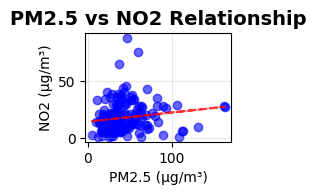

In [30]:
# 2. Scatter Plot of PM2.5 vs. NO2
if 'PM25' in pivot_df.columns and 'NO2' in pivot_df.columns:
    plt.subplot(3, 3, 2)
    plt.scatter(pivot_df['PM25'], pivot_df['NO2'], alpha=0.6, c='blue')
    plt.title('PM2.5 vs NO2 Relationship', fontsize=14, fontweight='bold')
    plt.xlabel('PM2.5 (μg/m³)')
    plt.ylabel('NO2 (μg/m³)')
    plt.grid(True, alpha=0.3)

    # Add trend line
    mask = pivot_df[['PM25', 'NO2']].notna().all(axis=1)
    if mask.sum() > 1:
        z = np.polyfit(pivot_df['PM25'][mask], pivot_df['NO2'][mask], 1)
        p = np.poly1d(z)
        plt.plot(pivot_df['PM25'][mask], p(pivot_df['PM25'][mask]), "r--", alpha=0.8)

Text(0.5, 1.0, 'Pollutant Correlation Heatmap')

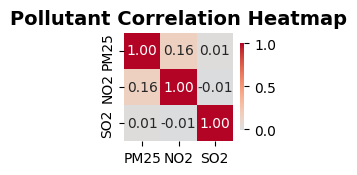

In [31]:
# 3. Heatmap of correlations
plt.subplot(3, 3, 4)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Pollutant Correlation Heatmap', fontsize=14, fontweight='bold')

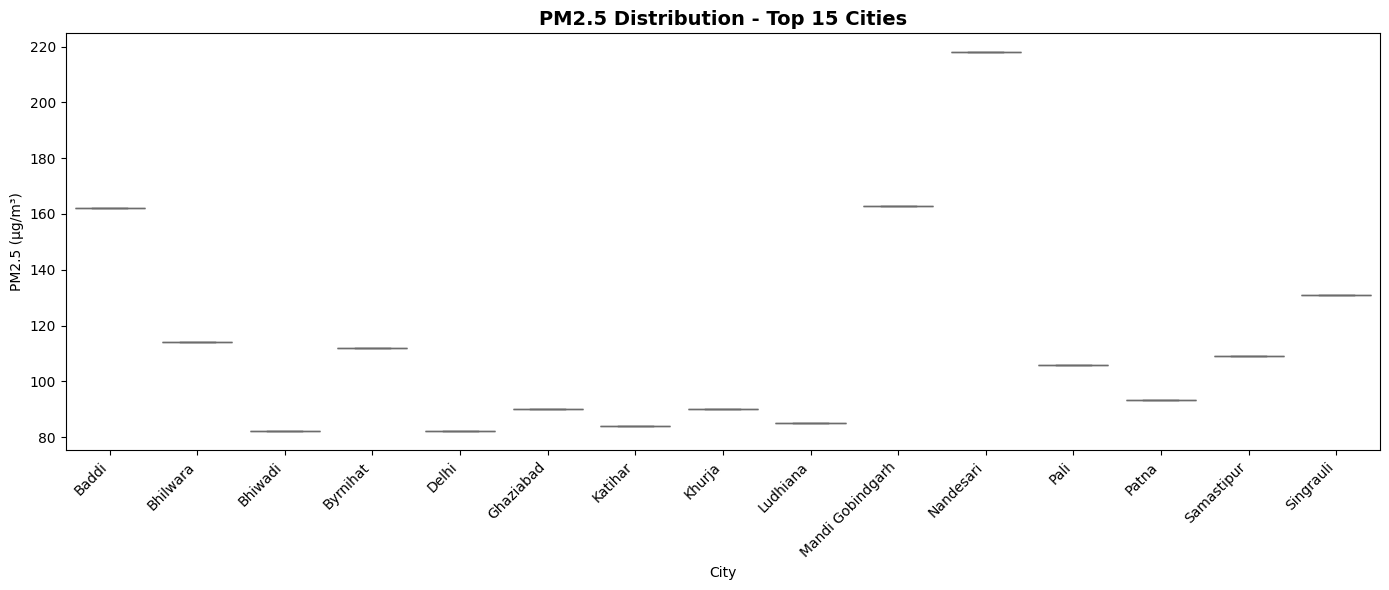

In [39]:
# Top 15 cities by PM2.5 average
top_cities = pivot_df.groupby('city')['PM25'].mean().sort_values(ascending=False).head(15).index
filtered_df = pivot_df[pivot_df['city'].isin(top_cities)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='city', y='PM25', data=filtered_df)
plt.title('PM2.5 Distribution - Top 15 Cities', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('PM2.5 (μg/m³)')
plt.xlabel('City')
plt.tight_layout()


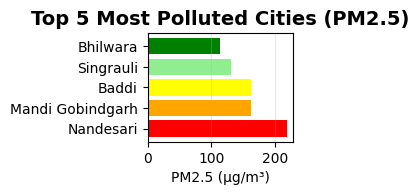

In [40]:
# 5. Top polluted cities ranking
if 'PM25' in pivot_df.columns:
    plt.subplot(3, 3, 7)
    top_cities = city_pm25_avg.head(5)
    colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
    plt.barh(range(len(top_cities)), top_cities.values, color=colors)
    plt.title('Top 5 Most Polluted Cities (PM2.5)', fontsize=14, fontweight='bold')
    plt.xlabel('PM2.5 (μg/m³)')
    plt.yticks(range(len(top_cities)), top_cities.index)
    plt.grid(axis='x', alpha=0.3)

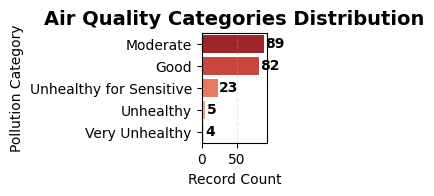


SUMMARY REPORT

🔍 KEY FINDINGS:
• Dataset contains 238 records across 238 cities
• Average PM2.5 level: 41.2 μg/m³ (WHO guideline: 15 μg/m³)
• Most polluted city (NO2): Chhapra (120.0 μg/m³)
• Correlation data available for PM25, NO2, SO2

⚠️ HEALTH IMPLICATIONS:
• 32 records show unhealthy PM2.5 levels
• 2 records show high NO2 levels

📊 DATA QUALITY:
• Missing values: 223 total
• Data from single date (June 24, 2025), limiting temporal analysis
• Pollutants included: PM25, NO2, SO2

🎯 RECOMMENDATIONS:
1. Address missing data for key pollutants
2. Expand temporal data collection for seasonal trends
3. Focus on high NO2 cities like Chhapra
4. Integrate spatial analysis using latitude/longitude


Analysis Complete! Adapted objectives achieved:
1. ✓ Analyzed available pollutants (PM2.5, NO2, SO2, etc.)
2. ✓ Compared air quality across cities
3. ✓ Visualized pollution levels with adjusted plots


In [51]:
plt.subplot(3, 3, 8)

def categorize_pollution(pm25):
    if pd.isna(pm25):
        return np.nan
    if pm25 <= 30:
        return 'Good'
    elif pm25 <= 60:
        return 'Moderate'
    elif pm25 <= 90:
        return 'Unhealthy for Sensitive'
    elif pm25 <= 120:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

pivot_df['pollution_category'] = pivot_df['PM25'].apply(categorize_pollution)
category_counts = pivot_df['pollution_category'].value_counts()

# Horizontal bar plot
sns.barplot(x=category_counts.values, y=category_counts.index, palette='Reds_r')

plt.title('Air Quality Categories Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Record Count')
plt.ylabel('Pollution Category')

# Add value labels at the end of bars
for i, (count, label) in enumerate(zip(category_counts.values, category_counts.index)):
    plt.text(count + 2, i, str(count), va='center', fontweight='bold')

# Optional: grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("SUMMARY REPORT")
print("="*50)

if 'PM25' in pivot_df.columns:
    average_pm25_formatted = f"{average_pm25:.1f}"
else:
    average_pm25_formatted = "N/A"

if 'NO2' in pivot_df.columns and not city_avg_no2.empty:
    city_highest_no2_formatted = city_highest_no2
    highest_no2_value_formatted = f"{highest_no2_value:.1f}"
else:
    city_highest_no2_formatted = "N/A"
    highest_no2_value_formatted = "N/A"

print(f"""
🔍 KEY FINDINGS:
• Dataset contains {len(pivot_df)} records across {pivot_df['city'].nunique()} cities
• Average PM2.5 level: {average_pm25_formatted} μg/m³ (WHO guideline: 15 μg/m³)
• Most polluted city (NO2): {city_highest_no2_formatted} ({highest_no2_value_formatted} μg/m³)
• Correlation data available for {', '.join(pollutants)}

⚠️ HEALTH IMPLICATIONS:
• {len(pivot_df[pivot_df['PM25'] > 60]) if 'PM25' in pivot_df.columns else 'N/A'} records show unhealthy PM2.5 levels
• {len(pivot_df[pivot_df['NO2'] > 80]) if 'NO2' in pivot_df.columns else 'N/A'} records show high NO2 levels

📊 DATA QUALITY:
• Missing values: {pivot_df.isna().sum().sum()} total
• Data from single date (June 24, 2025), limiting temporal analysis
• Pollutants included: {', '.join(pollutants)}

🎯 RECOMMENDATIONS:
1. Address missing data for key pollutants
2. Expand temporal data collection for seasonal trends
3. Focus on high NO2 cities like {city_highest_no2_formatted}
4. Integrate spatial analysis using latitude/longitude
""")

print("\nAnalysis Complete! Adapted objectives achieved:")
print("1. ✓ Analyzed available pollutants (PM2.5, NO2, SO2, etc.)")
print("2. ✓ Compared air quality across cities")
print("3. ✓ Visualized pollution levels with adjusted plots")

